In [12]:
import os
import torch
import matplotlib.pyplot as plt

In [21]:

def search_files(folder_path):
    results = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".pt"):  # Filter text files or adjust file extension as needed
            parts = filename.split("_")
            end_idx = 0
            for i, p in enumerate(parts):
                if(p[:6]=="subset"):
                    end_idx = i
            if(end_idx == 0):
                print("CORE ERROR")
            if len(parts) >= 7:
                dataset = parts[3]
                model = parts[4]
                file_type = "_".join(parts[5:end_idx])
                file_path = os.path.join(folder_path, filename)
                if dataset not in results:
                    results[dataset] = {}
                if model not in results[dataset]:
                    results[dataset][model] = {}
                results[dataset][model][file_type] = file_path
    return results

# Example usage:
folder_path = ".\\results"
result_dict = search_files(folder_path)
print(result_dict)


{'imdb': {'trans1': {'noise_no': '.\\results\\05_54_27_imdb_trans1_noise_no_subset5000_bs128_SGD_lr0.01_sigma0.05_rec1.pt', 'noise_layer': '.\\results\\06_04_37_imdb_trans1_noise_layer_subset5000_bs128_SGD_lr0.01_sigma0.05_rec1.pt', 'noise_all': '.\\results\\06_15_08_imdb_trans1_noise_all_subset5000_bs128_SGD_lr0.01_sigma0.05_rec1.pt', 'noise_after_all': '.\\results\\06_25_20_imdb_trans1_noise_after_all_subset5000_bs128_SGD_lr0.01_sigma0.005_rec1.pt', 'noise_after_layer': '.\\results\\06_34_58_imdb_trans1_noise_after_layer_subset5000_bs128_SGD_lr0.01_sigma0.005_rec1.pt'}, 'trans2': {'noise_no': '.\\results\\18_43_20_imdb_trans2_noise_no_subset5000_bs128_SGD_lr0.01_sigma0.05_rec1.pt', 'noise_layer': '.\\results\\18_57_30_imdb_trans2_noise_layer_subset5000_bs128_SGD_lr0.01_sigma0.05_rec1.pt', 'noise_all': '.\\results\\19_12_10_imdb_trans2_noise_all_subset5000_bs128_SGD_lr0.01_sigma0.05_rec1.pt', 'noise_after_all': '.\\results\\21_10_31_imdb_trans2_noise_after_all_subset5000_bs128_SGD_lr0

In [22]:
val = torch.load(result_dict["imdb"]["trans1"]["noise_no"])
val

{'rec_steps': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 'train_loss': [0.7176892890292366,
  0.6959622961700341,
  0.6913923750257793,
  0.7154776898159341,
  0.682171220232727,
  0.6711742999447378,
  0.6641669702378049,
  0.6573066324185414,
  0.6575248002246687,
  0.6588402679012082,
  0.6472861945249474,
  0.6408575799814453,
  0.6407082954030126,
  0.6365086990556899,
  0.6365651959066937,
  0.6285788128330446,
  0.6358699183555162,
  0.6314540942003772,
  0.6239716748523103,
  0.6268953206432855,
  0.6141088916237949,
  0.6118980972630202,
  0.6206422455751209,
  0.610954535614913,
  0.6086715201663365,
  0.6134989721000574,
  0.6249196271228183,
  0.5987035620744064,
  0.6016706695222553,
  0.5990018396620541,
  0.5992615135611999,
  

In [23]:
noises = list(result_dict["imdb"]["trans1"].keys())
noises

['noise_no',
 'noise_layer',
 'noise_all',
 'noise_after_all',
 'noise_after_layer']

In [ ]:
for dataset, dataset_data in result_dict.items():
    for model, model_data in dataset_data.items():
        plt.figure(figsize=(10, 6))
        plt.title(f"Dataset: {dataset}, Model: {model}")
        plt.xlabel("X-axis label")
        plt.ylabel("Y-axis label")
        for noise, file_path in model_data.items():
            with open(file_path, "r") as file:
                data = torch.load(file_path)  
                plt.plot(data["rec_steps"]) # Read data from file (adjust as needed)
                # Process data and plot accordingly
                # Example: plt.plot(x_values, y_values, label=file_type)
                # Adjust x_values and y_values based on your data
        plt.legend()
        plt.show()

In [35]:
torch.load(result_dict["imdb"]["trans1"]["noise_no"]).keys()

dict_keys(['rec_steps', 'train_loss', 'test_loss', 'hess', 'test_acc', 'train_acc', 'hess_trace', 'l1_norm', 'l2_norm', 'grad_norm'])

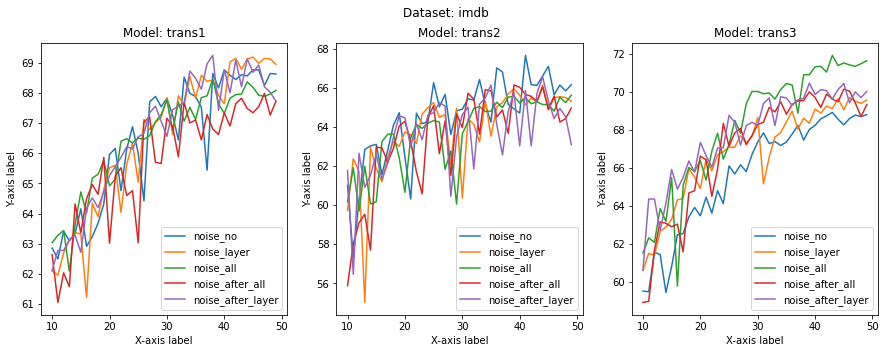

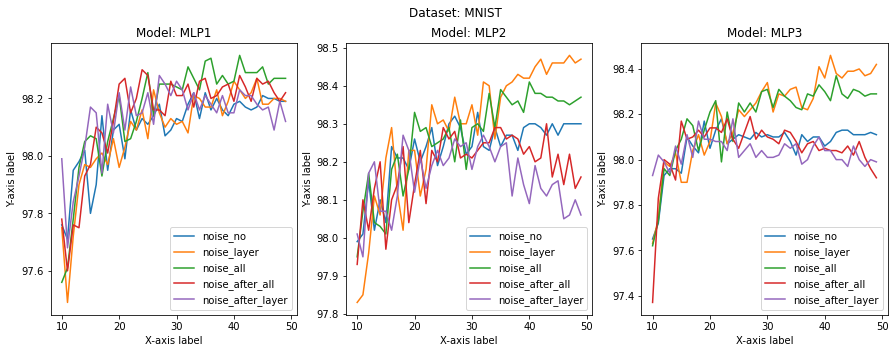

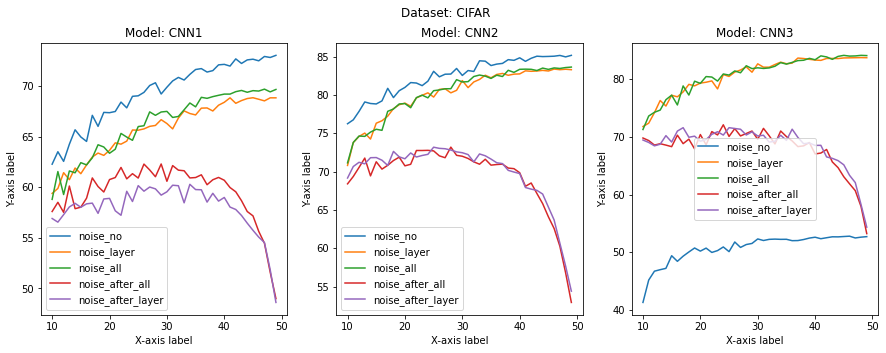

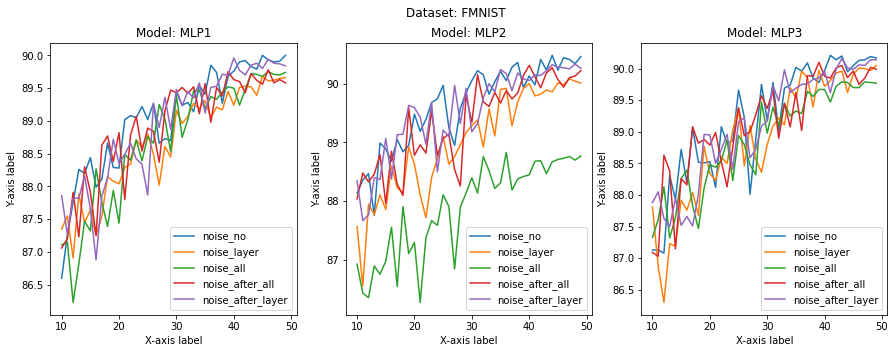

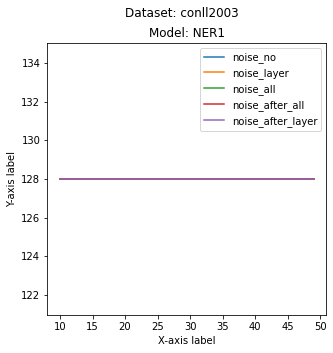

In [45]:
for dataset, dataset_data in result_dict.items():
    num_models = len(dataset_data)
    fig, axs = plt.subplots(1, num_models, figsize=(5*num_models, 5))
    fig.suptitle(f"Dataset: {dataset}")
    if num_models == 1:
        axs = [axs]  # Convert single subplot to a list to avoid subscripting
    for i, (model, model_data) in enumerate(dataset_data.items()):
        ax = axs[i]
        ax.set_title(f"Model: {model}")
        ax.set_xlabel("X-axis label")
        ax.set_ylabel("Y-axis label")
        for file_type, file_path in model_data.items():
            data = torch.load(file_path)  
            ax.plot(data["rec_steps"][10:], data["test_acc"][10:], label=file_type)
        ax.legend()
plt.show()